In [72]:
from api_keys import api_key
import requests
import pandas as pd
import matplotlib.pyplot as plt

base_url = "https://api.usa.gov/crime/fbi/sapi/api/hatecrimebybias/national/all/location/?limit=1&api_key=" + api_key

req = requests.get(base_url)

req.raise_for_status()  # raises exception when not a 2xx response


data = req.json()

data

In [4]:
hate_crime_df = pd.read_csv("hate_crime.csv", low_memory=False)

In [5]:
hate_crime_df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [6]:
hate_crime_df["REGION_NAME"].unique()

array(['South', 'West', 'Northeast', 'Midwest', 'U.S. Territories',
       'Other'], dtype=object)

In [8]:
hate_crime_df["ADULT_VICTIM_COUNT"].count()

51411

In [9]:
hate_crime_df["JUVENILE_VICTIM_COUNT"].count()

49539

In [10]:
hate_crime_df["VICTIM_TYPES"].unique()

array(['Individual', 'Religious Organization', 'Society/Public',
       'Business;Individual', 'Business', 'Other', 'Individual;Other',
       'Government', 'Business;Government', 'Government;Individual',
       'Individual;Society/Public', 'Individual;Religious Organization',
       'Unknown', 'Financial Institution', 'Individual;Unknown',
       'Business;Society/Public', 'Religious Organization;Society/Public',
       'Business;Government;Individual', 'Business;Other',
       'Financial Institution;Individual;Society/Public',
       'Business;Individual;Religious Organization',
       'Business;Religious Organization',
       'Financial Institution;Individual',
       'Government;Religious Organization', 'Business;Unknown',
       'Government;Unknown', 'Government;Society/Public',
       'Business;Individual;Other', 'Society/Public;Unknown',
       'Business;Financial Institution',
       'Government;Individual;Society/Public',
       'Business;Government;Religious Organization',
  

In [11]:
hate_crime_df["MULTIPLE_OFFENSE"].unique()

array(['S', 'M'], dtype=object)

In [12]:
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [9]:
hate_crime_df["OFFENDER_RACE"].unique()

array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', nan], dtype=object)

In [10]:
hate_crime_df.groupby("OFFENDER_RACE").count()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,JUVENILE_OFFENDER_COUNT,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
OFFENDER_RACE,,,,,,,,,,,,,,,,,,,,,
American Indian or Alaska Native,1211,1211,1211,1211,19,1211,1211,1211,1211,1211,...,365,245,1211,1211,1208,1211,1211,1211,1211,1211
Asian,1596,1596,1596,1596,52,1596,1596,1596,1596,1596,...,385,243,1596,1596,1582,1596,1596,1596,1596,1596
Black or African American,28507,28507,28507,28507,448,28507,28507,28507,28507,28507,...,8039,5277,28507,28507,28421,28507,28507,28507,28507,28507
Multiple,4423,4423,4423,4423,85,4423,4423,4423,4423,4423,...,1324,874,4423,4423,4367,4423,4423,4423,4423,4423
Native Hawaiian or Other Pacific Islander,83,83,83,83,3,83,83,83,83,83,...,79,67,83,83,78,83,83,83,83,83
Unknown,97334,97334,97334,97334,3878,97334,97334,97334,97334,97334,...,15844,14658,97334,97334,94370,97334,97334,97334,97334,97334
White,86403,86403,86403,86403,1945,86403,86403,86403,86403,86403,...,21067,13492,86403,86403,86052,86403,86403,86403,86403,86403


In [11]:
hate_crime_df["POPULATION_GROUP_DESC"].unique()

array(['Cities from 10,000 thru 24,999', 'Cities from 2,500 thru 9,999',
       'Cities from 50,000 thru 99,999',
       'Cities from 100,000 thru 249,999',
       'Non-MSA counties under 10,000',
       'Cities from 500,000 thru 999,999',
       'MSA counties from 25,000 thru 99,999',
       'Cities from 25,000 thru 49,999', 'MSA counties 100,000 or over',
       'Cities under 2,500', 'Cities from 250,000 thru 499,999',
       'Non-MSA counties from 10,000 thru 24,999',
       'Cities 1,000,000 or over', 'MSA counties under 10,000',
       'MSA counties from 10,000 thru 24,999',
       'Non-MSA counties from 25,000 thru 99,999',
       'Non-MSA counties 100,000 or over', 'Non-MSA State Police',
       'MSA State Police',
       'Possessions (Puerto Rico, Guam, Canal Zone, Virgin Islands, and American Samoa)'],
      dtype=object)

In [12]:
decade_bins = [1990,2000,2010,2020]
decade_labels = ["1991-2000","2001-2010","2011-2020"]

In [13]:
hate_crime_df["Decade"] = pd.cut(hate_crime_df["DATA_YEAR"],decade_bins,labels = decade_labels)

In [14]:
hate_crime_df[hate_crime_df["DATA_YEAR"] == 2011]

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,Decade
150211,156495,2011,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,NaN,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual,S,S,2011-2020
150212,156496,2011,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Lesbian (Female),Individual,S,S,2011-2020
150213,156497,2011,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,2011-2020
150214,156498,2011,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,NaN,1,Destruction/Damage/Vandalism of Property,0.0,Church/Synagogue/Temple/Mosque,Anti-Protestant,Religious Organization,S,S,2011-2020
150215,156499,2011,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,NaN,1,Aggravated Assault,1.0,Department/Discount Store,Anti-Islamic (Muslim),Individual,S,S,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156505,156412,2011,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S,2011-2020
156506,156413,2011,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,NaN,1,Simple Assault,1.0,Restaurant,Anti-Hispanic or Latino,Individual,S,S,2011-2020
156507,156395,2011,WVWSP2000,State Police:,Keyser,State Police,WV,West Virginia,South Atlantic,South,...,NaN,1,Intimidation,1.0,Other/Unknown,Anti-Black or African American,Individual,S,S,2011-2020
156508,156493,2011,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,NaN,2,Simple Assault,2.0,Bar/Nightclub,Anti-Lesbian (Female),Individual,S,S,2011-2020


### Incidents per Decade 

In [15]:
hate_crime_df.groupby("Decade")[["INCIDENT_ID"]].count()

,INCIDENT_ID
Decade,
1991-2000,73730
2001-2010,76481
2011-2020,69366


### Incidents per year for last 30 years

In [47]:
hate_crime_df_group_by_year = hate_crime_df.groupby("DATA_YEAR")
hate_crime_df_group_by_year

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,Decade
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,1991-2000
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,1991-2000
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,1991-2000
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,1991-2000
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,1991-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209278,864279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,2,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S,2011-2020
209279,1054279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,1,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual,S,S,2011-2020
209280,1054280,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Not Hispanic or Latino,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S,2011-2020
209281,1225414,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Hispanic or Latino,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,2011-2020


<AxesSubplot:xlabel='DATA_YEAR'>

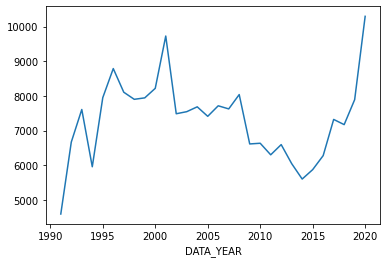

In [50]:
hate_crime_df_group_by_year["INCIDENT_ID"].count().plot()

### Incidents per year for last 10 year

In [54]:
incident_count = hate_crime_df_group_by_year[["INCIDENT_ID"]].count()

<AxesSubplot:xlabel='DATA_YEAR'>

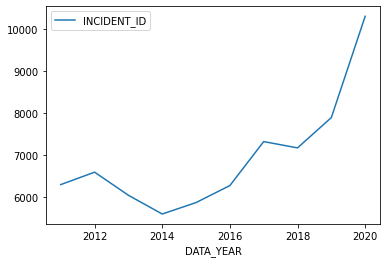

In [56]:
incident_count[incident_count.index > 2010].plot()

### Incident count for last 10 year region wise

In [100]:
hate_crime_df_last_10yr = hate_crime_df[hate_crime_df["DATA_YEAR"] > 2010]


In [101]:
hate_crime_df_group_by_region_year = hate_crime_df_last_10yr.groupby(["DATA_YEAR","REGION_NAME"])


In [102]:
hate_crime_df_group_by_region_year_count = hate_crime_df_group_by_region_year["INCIDENT_ID"].count()

<AxesSubplot:xlabel='DATA_YEAR'>

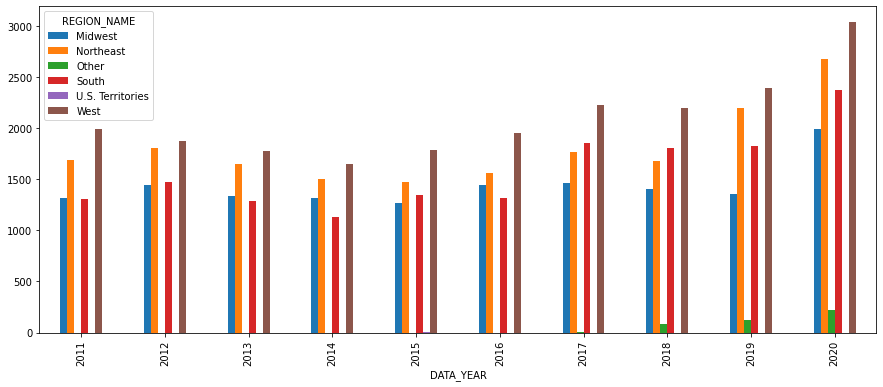

In [103]:
hate_crime_df_group_by_region_year_count.unstack(fill_value=0).plot.bar(figsize=(15,6))
